<img src="../images/matpl.png" alt="Drawing" style="width: 600px;"/>

Most of content is taken from below 2 links:

https://realpython.com/python-matplotlib-guide/#why-can-matplotlib-be-confusing
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

In [8]:
%matplotlib inline 

In [9]:
# always import like this

import matplotlib.pyplot as plt

In [4]:
import numpy as np  # necessity
import pandas as pd  # necessity
np.random.seed(100)  # random seed set for reproducibility

Matplotlib is a Python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. 

* Interesting fact! Why the library always imported like `import matplotlib.pyplot as plt`?  
Because using like `from pylab import *` or `%pylab` is a bad practice and Matplotlib advices against it. 

`from pylab import *` still exists for historical reasons, but it is highly advised not to use. It pollutes namespaces with functions that will shadow Python built-ins and can lead to hard-to-track bugs. To get IPython integration without imports the use of the %matplotlib magic is preferred. [source](https://matplotlib.org/users/shell.html#using-matplotlib-in-a-python-shell)

**Finding different types of plots to draw using matplotlib is easy and many documents/tutorials can be found. Important thing is to know the best practices of plotting. How to use axes, subplots etc. This short notebook is focussed on that**

### Inline plotting and %Matplotlib

The `%matplotlib` magic command enables plotting in the current Notebook. This magic takes an optional argument that specifies which Matplotlib backend should be used. Most of the time, in the Notebook, you will want to use the `inline` backend, which will embed plots inside the Notebook. Other option is `qt` backend which opens Matplotlib interactive UI in side window. 

**So there are multiple plotting UI that matplotlib offers which can be categorized like:**  

* Pop-up window and interactive:`%matplotlib qt` and `%matplotlib tk`
* Non interactive inline plots: `%matplotlib inline` 
* Interactive inline plots: `%matplotlib notebook` --> just don't use it. it makes switching difficult

### Understanding matplotlib object structure

figtype: <class 'matplotlib.figure.Figure'>
axis_type: <class 'matplotlib.axes._subplots.AxesSubplot'>
plt_gca_id 4426108880
axis_id 4426108880


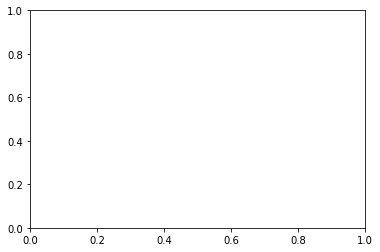

In [10]:
fig, ax = plt.subplots()

print('figtype:', type(fig))
print('axis_type:' , type(ax))
print('plt_gca_id', id(plt.gca())) 
print('axis_id', id(ax))

In [6]:
print('plt_gca_id', id(plt.gca())) 
print('axis_id', id(ax))

plt_gca_id 4425475352
axis_id 4424047360


<img src="../images/mat2.png" alt="Drawing" style="width: 600px;"/>
Source: https://matplotlib.org/faq/usage_faq.html